In [235]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = [8, 6]
sns.palplot(sns.color_palette('coolwarm', 7))

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [236]:
# import data

data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [237]:
# check shape of dataframe

data.shape

(891, 12)

In [238]:
# check length of dataframe

len(data)

891

In [239]:
# check data type

data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [240]:
# check unique value for all columns
unique_values = [] # an empty list to store data

for col in data.columns:
    unique_values.append((col, len(data[col].unique()), data[col].dtypes))

print(unique_values)

[('PassengerId', 891, dtype('int64')), ('Survived', 2, dtype('int64')), ('Pclass', 3, dtype('int64')), ('Name', 891, dtype('O')), ('Sex', 2, dtype('O')), ('Age', 89, dtype('float64')), ('SibSp', 7, dtype('int64')), ('Parch', 7, dtype('int64')), ('Ticket', 681, dtype('O')), ('Fare', 248, dtype('float64')), ('Cabin', 148, dtype('O')), ('Embarked', 4, dtype('O'))]


In [241]:
# keep data in a dataframe

df_unique = pd.DataFrame(data = unique_values)
df_unique

,0,1,2
0,PassengerId,891,int64
1,Survived,2,int64
2,Pclass,3,int64
3,Name,891,object
4,Sex,2,object
5,Age,89,float64
6,SibSp,7,int64
7,Parch,7,int64
8,Ticket,681,object
9,Fare,248,float64


In [242]:
df_unique = pd.DataFrame(data = unique_values, columns = ['column_name', 'unique_value', 'data_type'])
df_unique

,column_name,unique_value,data_type
0,PassengerId,891,int64
1,Survived,2,int64
2,Pclass,3,int64
3,Name,891,object
4,Sex,2,object
5,Age,89,float64
6,SibSp,7,int64
7,Parch,7,int64
8,Ticket,681,object
9,Fare,248,float64


In [243]:
# check category data

data_attr = data.select_dtypes(include = 'object')
data_attr.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [244]:
data_attr.shape

(891, 5)

In [245]:
# check numerical data

data_nums = data.select_dtypes(include = 'number')
data_nums.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [246]:
data_nums.shape

(891, 7)

In [247]:
# drop some columns

drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']

df = data.drop(columns = drop_cols)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [248]:
# quick summarize data

df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [249]:
df.describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [250]:
# check missing values

df.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [251]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [252]:
df.isna().sum()/len(df)*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [253]:
# fill Age's NaN with it's mean value

df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [255]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [256]:
# fill Embarked's NaN with it's mode value

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [258]:
df.isna().any().any()

False

In [259]:
# visualize data - numeric attribute using histograms

# check numerical data

df_nums = df.select_dtypes(include = 'number')
df_nums.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


<Figure size 800x600 with 0 Axes>

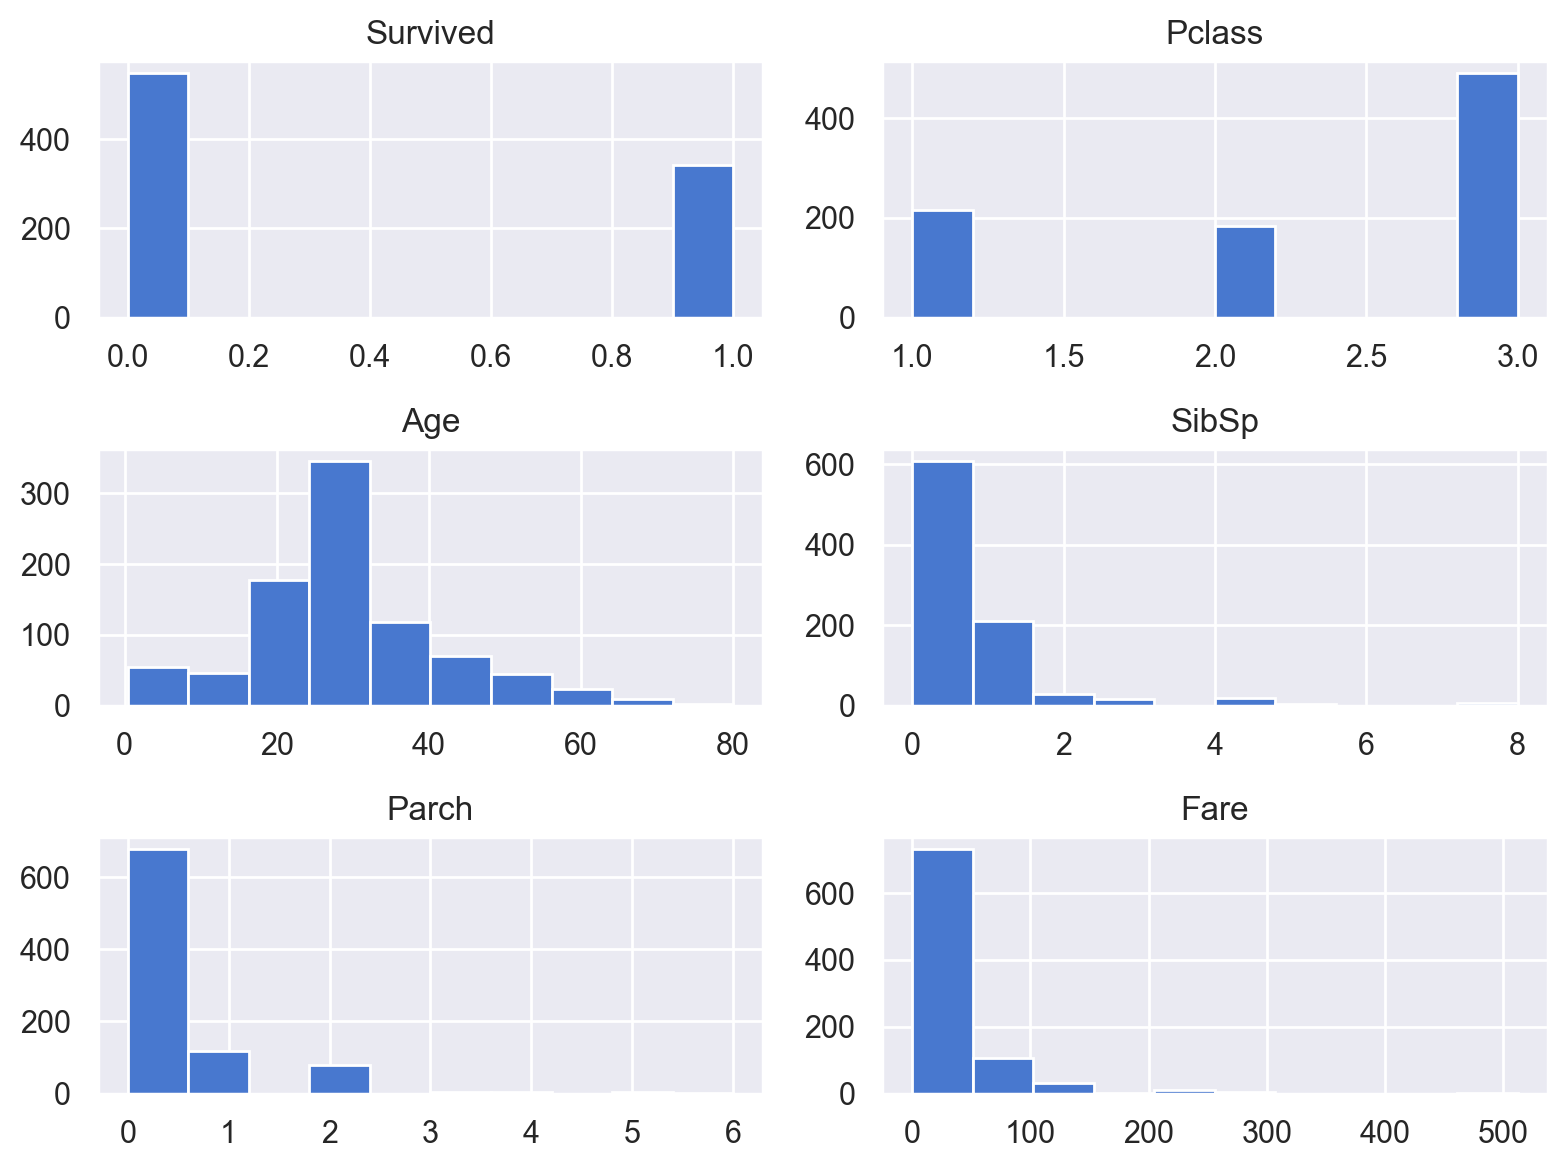

In [260]:
plt.rcParams['figure.figsize'] = (8, 6)

plt.figure()
df_nums.hist()

plt.tight_layout()
plt.show()

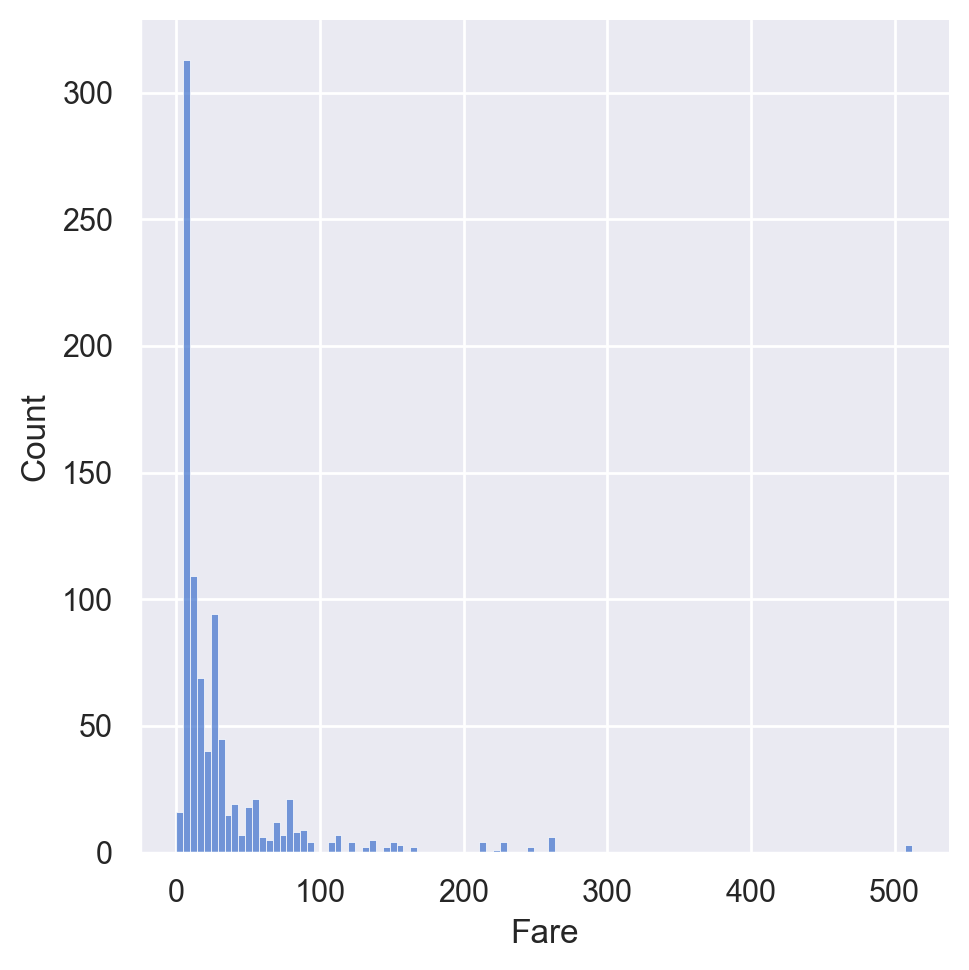

In [261]:
# plot Fare distribution

plt.rcParams['figure.figsize'] = (6, 4)

sns.displot(df['Fare']);

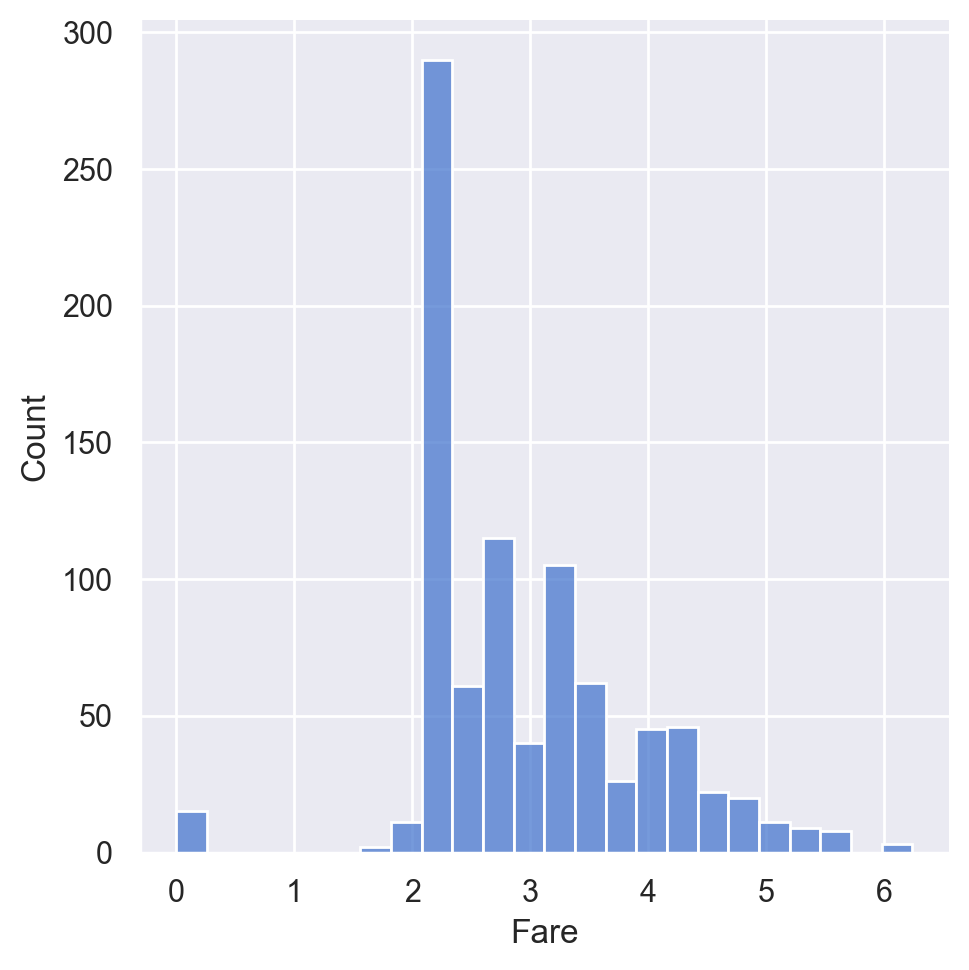

In [262]:
# There are 0 Fare. This is skewed distribution.
# We are going to unskew data by taking log ( +1 to make the positive data to take log)

sns.displot(np.log(df['Fare'] + 1));

In [263]:
# use sklearn's StandardScaler() to peform standardization

from sklearn.preprocessing import StandardScaler

In [264]:
# add new column

df['Fare_log'] = np.log(df['Fare'] + 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_log
0,0,3,male,22.0,1,0,7.2500,S,2.110213
1,1,1,female,38.0,1,0,71.2833,C,4.280593
2,1,3,female,26.0,0,0,7.9250,S,2.188856
3,1,1,female,35.0,1,0,53.1000,S,3.990834
4,0,3,male,35.0,0,0,8.0500,S,2.202765


In [265]:
scaler = StandardScaler()
scaler

StandardScaler()

In [266]:
# add new column

df['Fare_scaled'] = scaler.fit_transform(df['Fare_log'].values.reshape(-1, 1))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_log,Fare_scaled
0,0,3,male,22.000000,1,0,7.2500,S,2.110213,-0.879741
1,1,1,female,38.000000,1,0,71.2833,C,4.280593,1.361220
2,1,3,female,26.000000,0,0,7.9250,S,2.188856,-0.798540
3,1,1,female,35.000000,1,0,53.1000,S,3.990834,1.062038
4,0,3,male,35.000000,0,0,8.0500,S,2.202765,-0.784179
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,2.639057,-0.333698
887,1,1,female,19.000000,0,0,30.0000,S,3.433987,0.487082
888,0,3,female,29.699118,1,2,23.4500,S,3.196630,0.242007
889,1,1,male,26.000000,0,0,30.0000,C,3.433987,0.487082


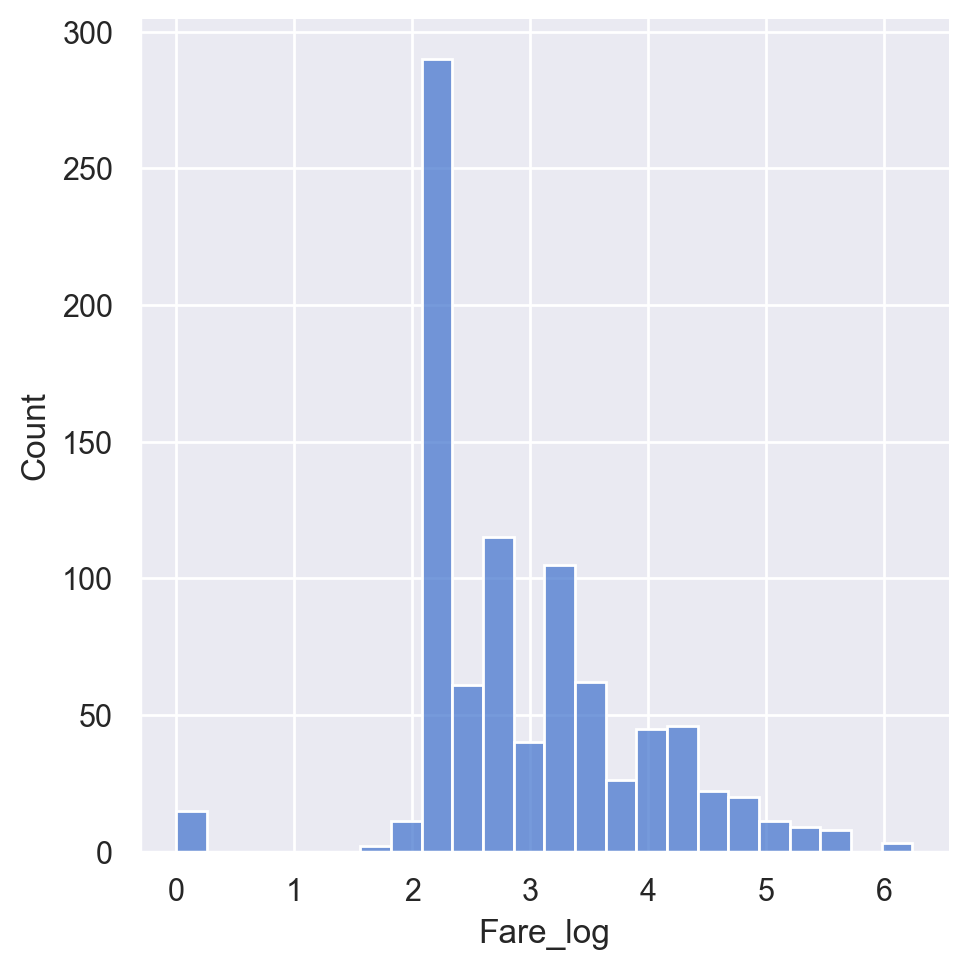

In [267]:
sns.displot(df['Fare_log']);

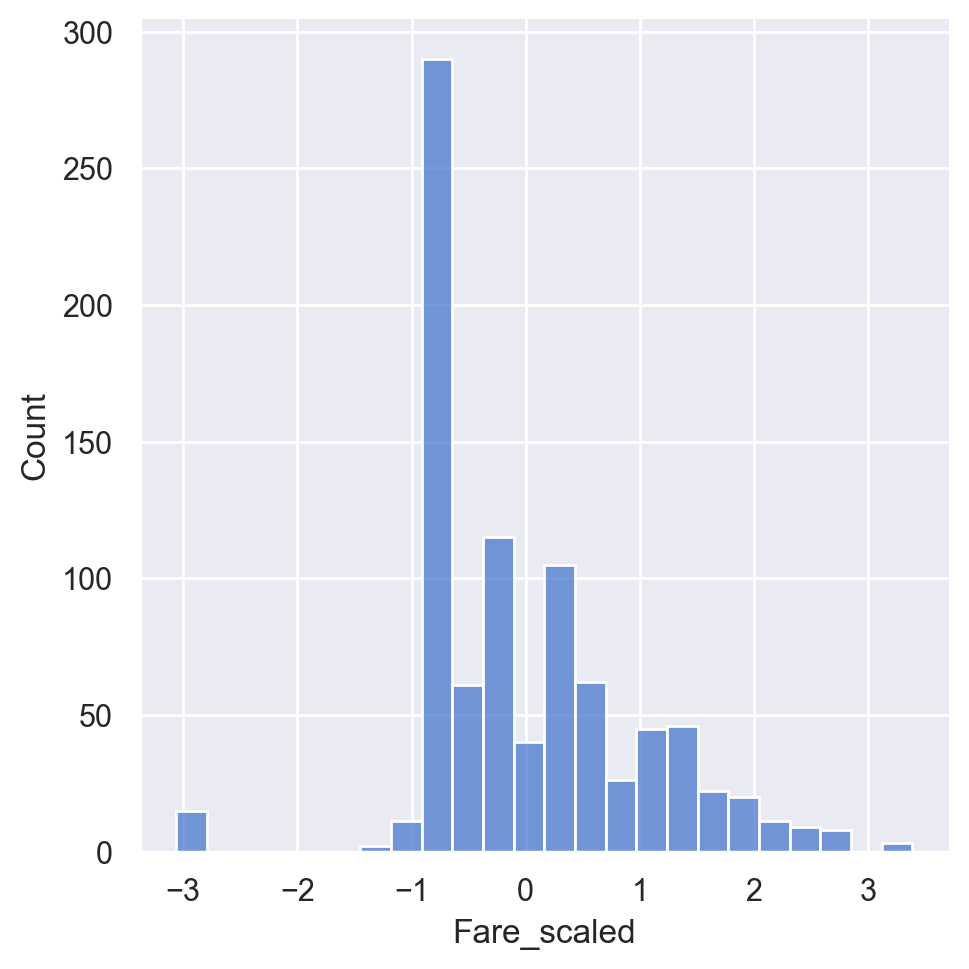

In [268]:
sns.displot(df['Fare_scaled']);

In [269]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_log,Fare_scaled
0,0,3,male,22.0,1,0,7.2500,S,2.110213,-0.879741
1,1,1,female,38.0,1,0,71.2833,C,4.280593,1.361220
2,1,3,female,26.0,0,0,7.9250,S,2.188856,-0.798540
3,1,1,female,35.0,1,0,53.1000,S,3.990834,1.062038
4,0,3,male,35.0,0,0,8.0500,S,2.202765,-0.784179


In [270]:
# drop columns

df = df.drop(['Fare', 'Fare_log'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_scaled
0,0,3,male,22.0,1,0,S,-0.879741
1,1,1,female,38.0,1,0,C,1.361220
2,1,3,female,26.0,0,0,S,-0.798540
3,1,1,female,35.0,1,0,S,1.062038
4,0,3,male,35.0,0,0,S,-0.784179


<AxesSubplot: >

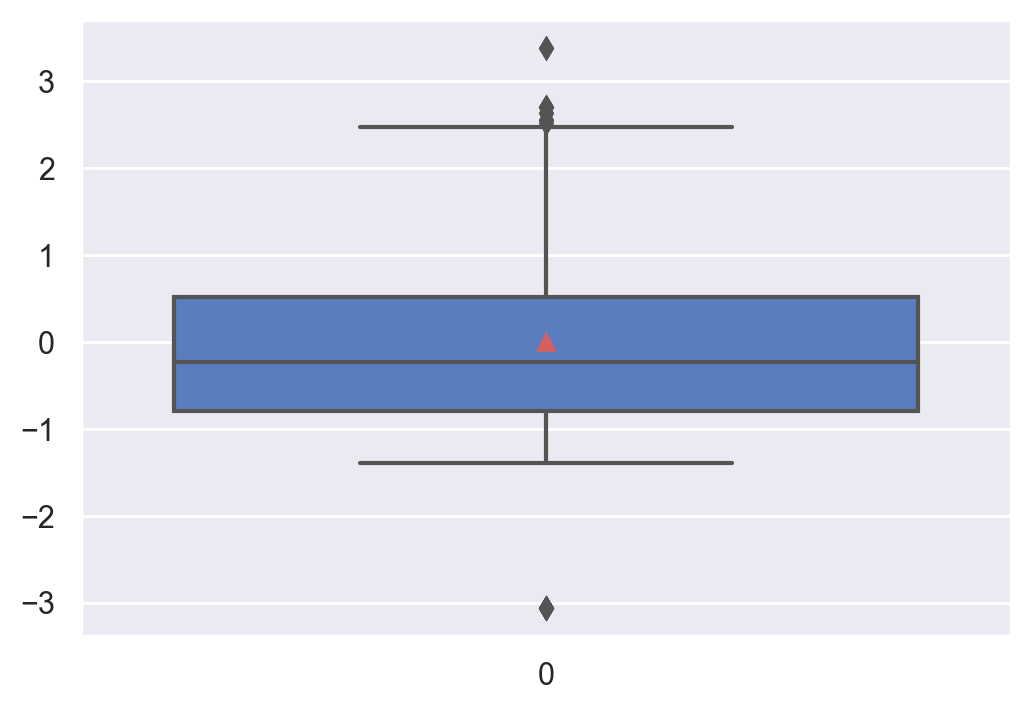

In [271]:
sns.boxplot(df['Fare_scaled'], showmeans = True)

In [272]:
# deal with the outlier

upper_threshold = df.Fare_scaled.mean() + (3 * df['Fare_scaled'].std()) # mean + 3 sigma
lower_threshold = df.Fare_scaled.mean() - (3 * df['Fare_scaled'].std()) # mean - 3 sigma
upper_threshold, lower_threshold

(3.0016849200991373, -3.0016849200991373)

In [273]:
df.shape

(891, 8)

In [274]:
# filler out data > the threshold

df = df.loc[df['Fare_scaled'] <= upper_threshold]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_scaled
0,0,3,male,22.0,1,0,S,-0.879741
1,1,1,female,38.0,1,0,C,1.361220
2,1,3,female,26.0,0,0,S,-0.798540
3,1,1,female,35.0,1,0,S,1.062038
4,0,3,male,35.0,0,0,S,-0.784179


In [275]:
df.shape

(888, 8)

In [276]:
df = df.loc[df['Fare_scaled'] >= lower_threshold]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_scaled
0,0,3,male,22.0,1,0,S,-0.879741
1,1,1,female,38.0,1,0,C,1.361220
2,1,3,female,26.0,0,0,S,-0.798540
3,1,1,female,35.0,1,0,S,1.062038
4,0,3,male,35.0,0,0,S,-0.784179


In [277]:
df.shape

(873, 8)

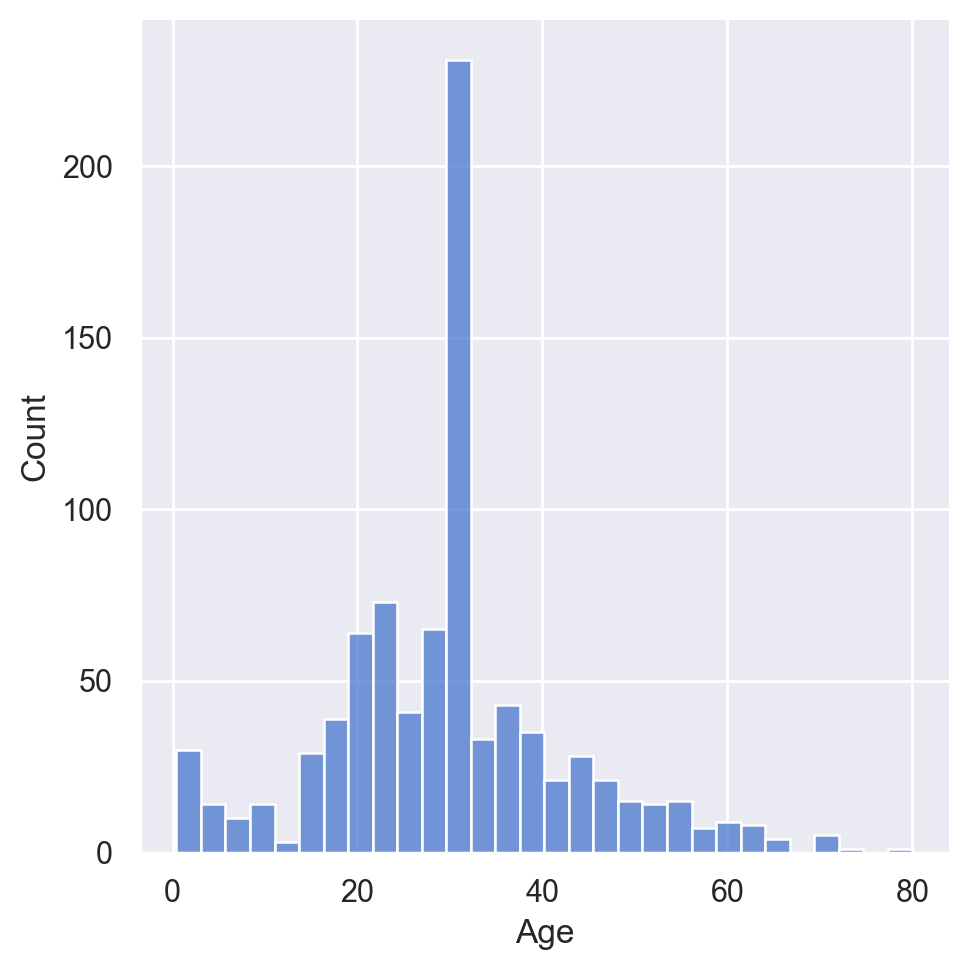

In [278]:
# let's study the Age

sns.displot(df['Age']);

<AxesSubplot: >

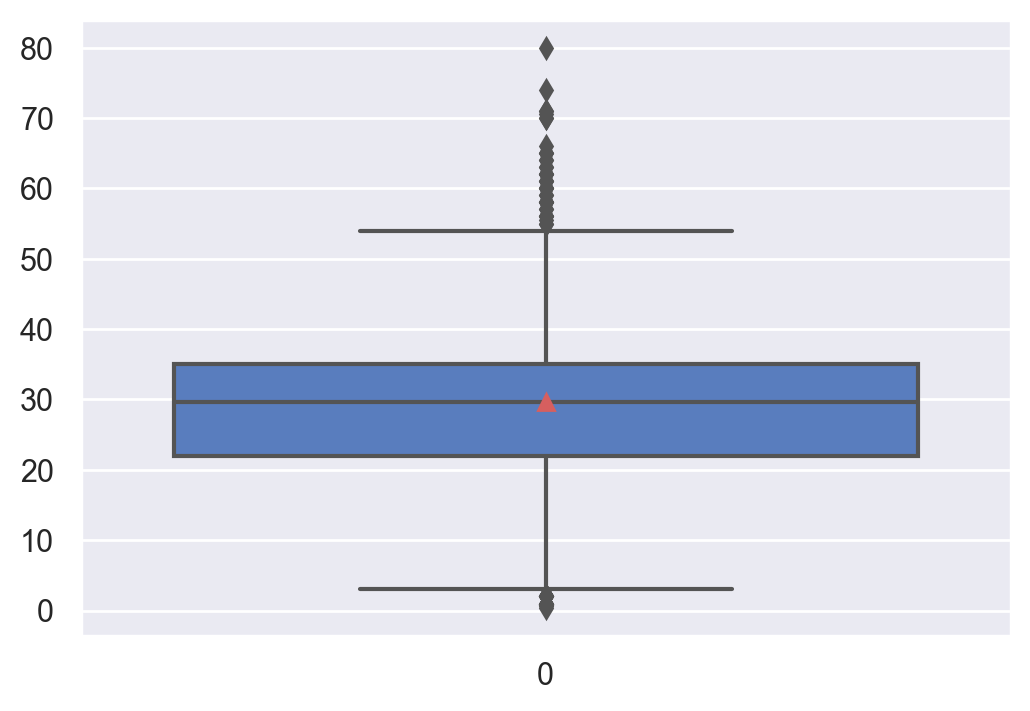

In [279]:
sns.boxplot(df['Age'], showmeans = True)